<a href="https://colab.research.google.com/github/subhashpolisetti/network-traffic-visualizer/blob/main/Network_Traffic_Analysis_with_Python_and_Wireshark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Network Traffic from a .pcap File**

This notebook is designed to analyze network traffic data captured in a `.pcap` file. The analysis involves extracting key information about network packets, summarizing the data, and generating insightful visualizations. Below is a detailed description of the notebook's functionality.

---

## **Purpose**
The goal is to understand the network traffic by analyzing key metrics such as source and destination IP addresses, protocols used, packet lengths, and traffic volume over time. This analysis is performed using tools like `tshark` and Python libraries (`pandas`, `matplotlib`, and `seaborn`).

---

## **Workflow**

### 1. **Dependency Installation**
Install `tshark` for packet data extraction and Python libraries (`pandas`, `matplotlib`, `seaborn`) for data analysis and visualization.

### 2. **Upload the `.pcap` File**
You will be prompted to upload your `.pcap` file containing the network traffic data. This file serves as the input for the analysis.

### 3. **Extract Data Using `tshark`**
- Extract packet data fields such as:
  - Timestamp
  - Source IP address
  - Destination IP address
  - Protocol used
  - Packet length
- Parse the extracted data into a structured `pandas` DataFrame for further analysis.

### 4. **Data Cleaning and Transformation**
- Convert the raw timestamp into human-readable datetime format.
- Ensure numeric fields, such as packet lengths, are correctly formatted for analysis.

### 5. **Summary Statistics**
Display statistical summaries of the dataset, including:
- Packet lengths
- Counts of different protocols
- Traffic volume statistics

### 6. **Visualizations**
Generate insightful visualizations to interpret the network traffic:
- **Protocol Distribution:** A bar plot showing the frequency of different protocols in the captured traffic.
- **Top Source IPs:** A bar plot highlighting the top 10 source IP addresses with the most packet activity.
- **Top Destination IPs:** A bar plot displaying the top 10 destination IP addresses receiving the most traffic.
- **Traffic Volume Over Time:** A line plot showing the total traffic volume (in bytes) over time.
- **Packet Size Distribution:** A histogram with a density curve visualizing the distribution of packet sizes.

---

## **Key Insights**
This analysis can help:
- Identify frequently used protocols and their prevalence in the network.
- Detect patterns in source and destination IP addresses to understand network activity.
- Observe traffic patterns over time to detect anomalies or peaks in usage.
- Understand the distribution of packet sizes, revealing specific network behaviors.

---

## **Applications**
This notebook is useful for:
- Network administrators analyzing network performance.
- Cybersecurity analysts detecting unusual traffic patterns.
- Researchers gaining insights into network usage trends.

---

## **How to Use**
1. Run the notebook cell by cell.
2. Upload your `.pcap` file when prompted.
3. Review the extracted data and visualizations to interpret the network traffic.

By the end of the notebook, you’ll have a detailed analysis of your `.pcap` file with insightful visualizations to help understand the captured network traffic.


In [14]:
# Install required dependencies
!apt-get install -y tshark
!pip install pandas matplotlib seaborn


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libbcg729-0 libc-ares2 liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpcap0.8 libsbc1 libsmi2ldbl
  libspandsp2 libspeexdsp1 libwireshark-data libwireshark15 libwiretap12 libwsutil13
  wireshark-common
Suggested packages:
  mmdb-bin snmp-mibs-downloader geoipupdate geoip-database geoip-database-extra libjs-leaflet
  libjs-leaflet.markercluster wireshark-doc
The following NEW packages will be installed:
  libbcg729-0 libc-ares2 liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpcap0.8 libsbc1 libsmi2ldbl
  libspandsp2 libspeexdsp1 libwireshark-data libwireshark15 libwiretap12 libwsutil13 tshark
  wireshark-common
0 upgraded, 16 newly installed, 0 to remove and 49 not upgraded.
Need to get 23.0 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmaxmindd

In [15]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess


In [22]:
# Step 1: Upload the .pcap file
print("Please upload your .pcap file:")
uploaded = files.upload()
file_path = list(uploaded.keys())[0]  # Get the uploaded file name

Please upload your .pcap file:


Saving network_traffic.pcap to network_traffic (3).pcap


In [23]:
# Step 2: Extract data from .pcap file using tshark
print("Extracting data from pcap file...")
tshark_command = [
    "tshark", "-r", file_path,
    "-T", "fields",
    "-e", "frame.time_epoch",
    "-e", "ip.src",
    "-e", "ip.dst",
    "-e", "_ws.col.Protocol",
    "-e", "frame.len"
]
result = subprocess.run(tshark_command, stdout=subprocess.PIPE, text=True)

# Parse the output into a DataFrame
data = []
for line in result.stdout.splitlines():
    parts = line.split("\t")
    if len(parts) == 5:  # Ensure valid data
        data.append(parts)

df = pd.DataFrame(data, columns=["Time", "Source", "Destination", "Protocol", "Length"])
df["Time"] = pd.to_datetime(df["Time"], unit="s")  # Convert time
df["Length"] = df["Length"].astype(int)  # Convert length to integer

Extracting data from pcap file...


<ipython-input-23-1cb164c06b7e>:17: RuntimeWarning: coroutine 'Capture._get_tshark_process' was never awaited
  parts = line.split("\t")
<ipython-input-23-1cb164c06b7e>:22: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["Time"] = pd.to_datetime(df["Time"], unit="s")  # Convert time


In [24]:
# Step 3: Display summary statistics
print("Summary of the data:")
print(df.describe())

Summary of the data:
                                Time       Length
count                           7655  7655.000000
mean   2025-01-03 07:01:48.868591104   355.918485
min    2025-01-03 07:00:41.221867085    42.000000
25%    2025-01-03 07:01:33.959882496    74.000000
50%    2025-01-03 07:01:36.740657920    97.000000
75%    2025-01-03 07:02:17.017387520   377.000000
max    2025-01-03 07:02:40.978316069  1514.000000
std                              NaN   475.119285


In [25]:

# Step 2: Extract data from .pcap file using tshark
print("Extracting data from pcap file...")
tshark_command = [
    "tshark", "-r", file_path,
    "-T", "fields",
    "-e", "frame.time_epoch",
    "-e", "ip.src",
    "-e", "ip.dst",
    "-e", "_ws.col.Protocol",
    "-e", "frame.len"
]
result = subprocess.run(tshark_command, stdout=subprocess.PIPE, text=True)

# Parse the output into a DataFrame
data = []
for line in result.stdout.splitlines():
    parts = line.split("\t")
    if len(parts) == 5:  # Ensure valid data
        data.append(parts)

df = pd.DataFrame(data, columns=["Time", "Source", "Destination", "Protocol", "Length"])

# Fix time conversion warning
df["Time"] = pd.to_numeric(df["Time"], errors="coerce")  # Convert to numeric first
df["Time"] = pd.to_datetime(df["Time"], unit="s")  # Convert time

# Convert Length to integer
df["Length"] = pd.to_numeric(df["Length"], errors="coerce", downcast="integer")

Extracting data from pcap file...


In [26]:
# Step 3: Display summary statistics
print("Summary of the data:")
print(df.describe())


Summary of the data:
                                Time       Length
count                           7655  7655.000000
mean   2025-01-03 07:01:48.868591104   355.918485
min    2025-01-03 07:00:41.221867085    42.000000
25%    2025-01-03 07:01:33.959882496    74.000000
50%    2025-01-03 07:01:36.740657920    97.000000
75%    2025-01-03 07:02:17.017387520   377.000000
max    2025-01-03 07:02:40.978316069  1514.000000
std                              NaN   475.119285


<ipython-input-27-5d6ca6262e96>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=protocol_counts.index, y=protocol_counts.values, palette="viridis")


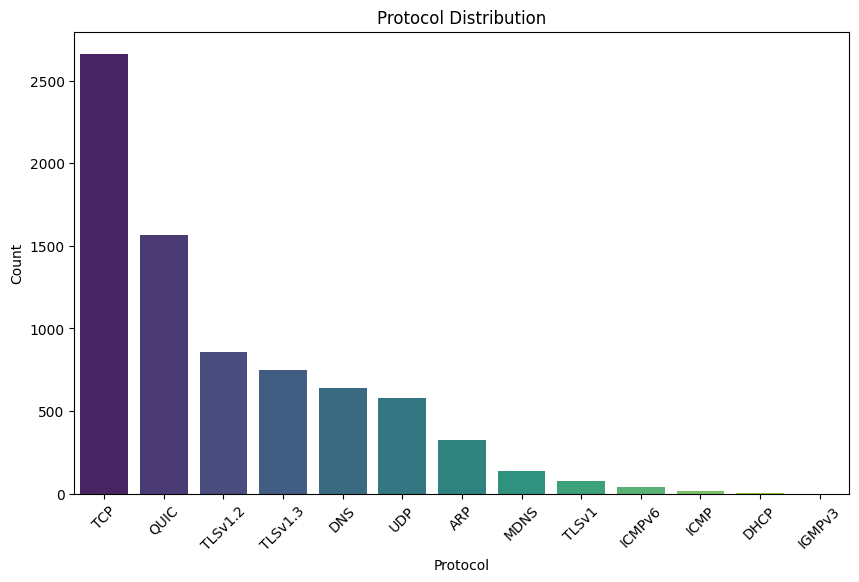

In [27]:
# Step 4: Plot protocol distribution
protocol_counts = df['Protocol'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=protocol_counts.index, y=protocol_counts.values, palette="viridis")
plt.title('Protocol Distribution')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-28-f821a73b2efb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_source_ips.values, y=top_source_ips.index, palette="plasma")


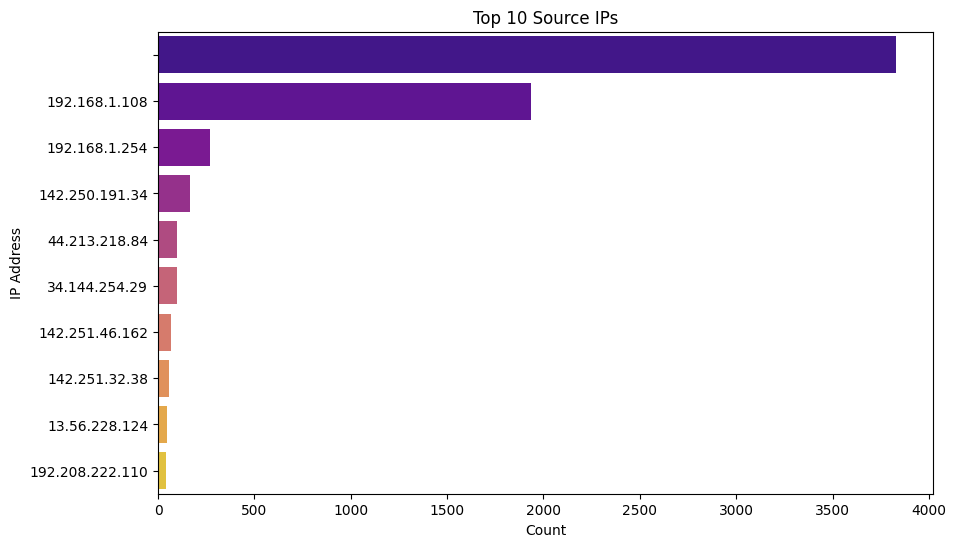

In [28]:
# Step 5: Plot top source IPs
top_source_ips = df['Source'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_source_ips.values, y=top_source_ips.index, palette="plasma")
plt.title('Top 10 Source IPs')
plt.xlabel('Count')
plt.ylabel('IP Address')
plt.show()

<ipython-input-29-ff207e5b24af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_destination_ips.values, y=top_destination_ips.index, palette="plasma")


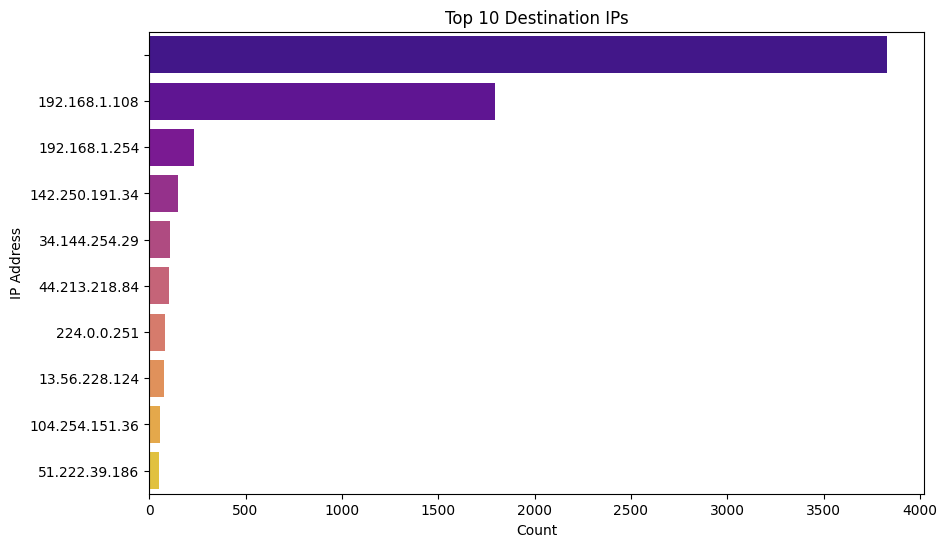

In [29]:
# Step 6: Plot top destination IPs
top_destination_ips = df['Destination'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_destination_ips.values, y=top_destination_ips.index, palette="plasma")
plt.title('Top 10 Destination IPs')
plt.xlabel('Count')
plt.ylabel('IP Address')
plt.show()

<ipython-input-30-a57b9fe16a89>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  traffic_volume = df.resample('1T')['Length'].sum()


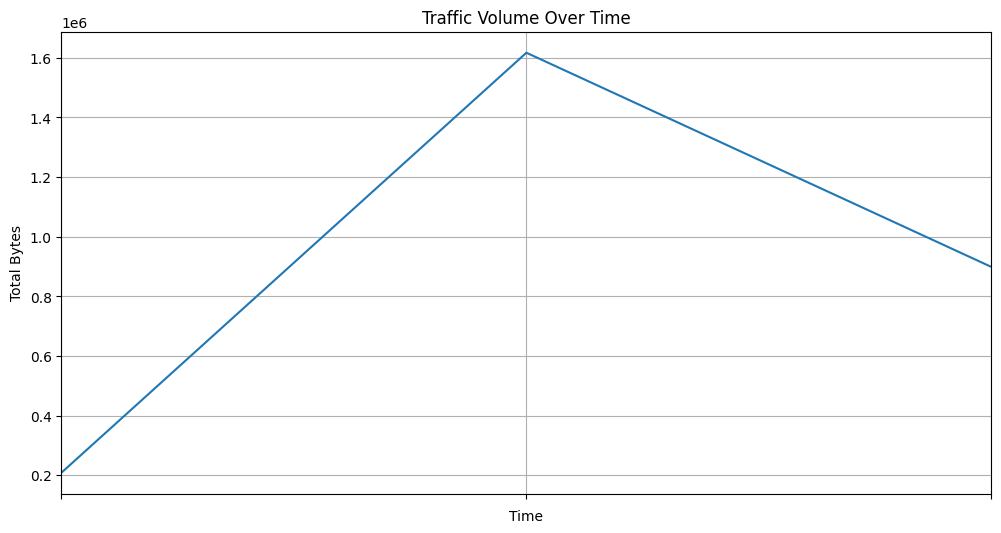

In [30]:
# Step 7: Plot traffic volume over time
df.set_index('Time', inplace=True)
traffic_volume = df.resample('1T')['Length'].sum()
plt.figure(figsize=(12, 6))
traffic_volume.plot()
plt.title('Traffic Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Total Bytes')
plt.grid()
plt.show()


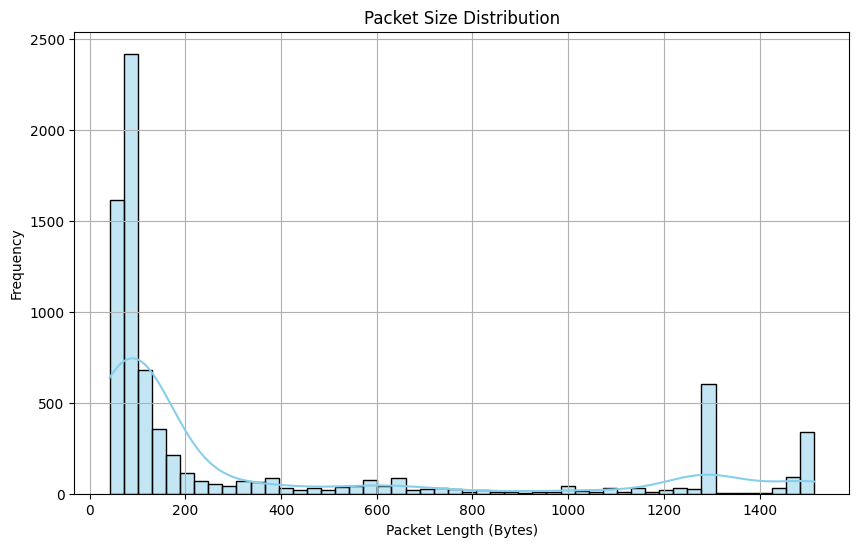

In [31]:
# Step 8: Plot packet size distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Length'], bins=50, kde=True, color='skyblue')
plt.title('Packet Size Distribution')
plt.xlabel('Packet Length (Bytes)')
plt.ylabel('Frequency')
plt.grid()
plt.show()